In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
os.listdir('../keypointDet')

['.ipynb_checkpoints',
 'IdLookupTable.csv',
 'input',
 'KeyDet.ipynb',
 'model',
 'SampleSubmission.csv',
 'test',
 'training',
 '보고서_1102250001_김준수.hwp']

## 1. 데이터 불러오기

In [3]:
Train_Dir = '../keypointDet/training/training.csv'
Test_Dir = '../keypointDet/test/test.csv'
lookid_Dir = '../keypointDet/IdLookupTable.csv'

train_Data = pd.read_csv(Train_Dir)
test_Data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_Dir)

In [4]:
train_Data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [5]:
train_Data['Image'][2]

'144 142 159 180 188 188 184 180 167 132 84 59 54 57 62 61 55 54 56 50 60 78 85 86 88 89 90 90 88 89 91 94 95 98 99 101 104 107 109 105 102 104 105 104 105 108 110 111 111 109 108 106 108 109 108 107 108 108 102 99 102 105 102 100 99 100 102 103 103 106 108 107 106 102 94 84 64 45 49 63 88 94 94 96 104 156 176 175 205 213 208 207 207 208 207 207 143 142 161 183 186 187 182 174 147 100 69 60 59 60 56 50 60 68 56 57 73 88 90 91 89 90 91 91 92 94 96 99 102 101 100 100 103 104 104 104 103 107 108 106 111 115 112 111 113 113 112 107 103 109 110 110 108 106 104 104 103 104 105 102 105 104 105 108 107 106 105 108 109 106 99 92 78 59 50 60 84 100 109 117 119 135 165 179 207 217 210 207 208 208 208 207 143 140 160 182 185 186 184 175 141 94 71 63 60 54 50 62 73 66 65 80 90 90 87 90 91 92 93 98 96 95 100 99 99 100 99 102 101 100 107 107 108 109 109 109 112 113 112 112 111 115 113 109 104 107 112 112 108 107 104 104 104 103 105 105 103 100 101 107 111 106 104 111 113 110 107 100 89 80 65 56 69 94

In [6]:
train_Data['Image'].shape

(7049,)

## 2. 비어있는 데이터 없애기

In [7]:
train_Data.isnull().any().value_counts()

True     28
False     3
dtype: int64

### method : 결측값을 변경할 방식입니다. 
- bfill로 할경우 결측값을 바로 아래 값과 동일하게 변경합니다.
- ffill로 할 경우 결측값을 바로 위 값과 동일하게 변경합니다.

### inplace : 원본을 변경할지 여부입니다. 
- True일 경우 원본을 변경하게 됩니다.

In [8]:
train_Data.fillna(method = 'ffill',  inplace = True)

In [9]:
train_Data.isnull().any().value_counts()

False    31
dtype: int64

## 3. 데이터 분류

In [10]:
imag = []
for i in range(0, 7049):
    img = train_Data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [11]:
image_list = np.array(imag, dtype ='float')
X_train = image_list.reshape(-1, 96, 96 ,1) # 7049장에 96*96(9216)의 해상도를 보유
image_list.shape

(7049, 9216)

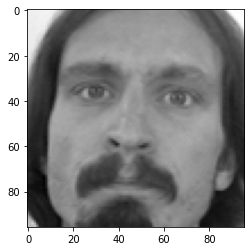

In [12]:
plt.imshow(X_train[0].reshape(96,96), cmap = 'gray')

In [13]:
training = train_Data.drop('Image', axis = 1)
training

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.265961,67.029093,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,47.910346,66.626011,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,49.462572,67.515161,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,50.754202,66.724988,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.065186,79.586447


- iloc은 integer location의 약어로 데이터 프레임의 행이나 칼러음의 수를 나타낸다.
- df.iloc[i, :]의 경우 전체 프레임 인덱스에서 i번째 행의 있는 값만 추출하라는 뜻이다.

In [14]:
y_train = []
for i in range(0, 7049):
    y = training.iloc[i, :]
    y_train.append(y)
y_train = np.array(y_train, dtype = 'float')
y_train.shape

(7049, 30)

## 4. 학습 준비

In [15]:
#pip install tensorflow
#pip install keras

In [17]:
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

In [18]:
model = Sequential()
# input의 경우 (96, 96, 1)이다.
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        288       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 96, 96, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                        

In [19]:
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics=['mae'])

In [20]:
model.fit(X_train, y_train, epochs = 50, batch_size = 256, validation_split = 0.2)

Epoch 1/50
23/23 [==============================] - 82s 4s/step - loss: 351.7115 - mae: 12.1146 - val_loss: 620.6093 - val_mae: 23.1416
Epoch 2/50
23/23 [==============================] - 83s 4s/step - loss: 34.8234 - mae: 4.5973 - val_loss: 163.1598 - val_mae: 11.6784
Epoch 3/50
23/23 [==============================] - 82s 4s/step - loss: 28.8799 - mae: 4.1650 - val_loss: 77.0152 - val_mae: 7.8834
Epoch 4/50
23/23 [==============================] - 82s 4s/step - loss: 24.6991 - mae: 3.8372 - val_loss: 57.0939 - val_mae: 6.6351
Epoch 5/50
23/23 [==============================] - 83s 4s/step - loss: 22.6099 - mae: 3.6535 - val_loss: 65.4394 - val_mae: 7.2597
Epoch 6/50
23/23 [==============================] - 85s 4s/step - loss: 21.2435 - mae: 3.5385 - val_loss: 44.0770 - val_mae: 5.8568
Epoch 7/50
23/23 [==============================] - 87s 4s/step - loss: 19.3502 - mae: 3.3613 - val_loss: 26.1516 - val_mae: 4.5137
Epoch 8/50
23/23 [==============================] - 86s 4s/step - loss